In [1]:
#Importing the necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
from datetime import datetime
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


%matplotlib inline

In [2]:
df=pd.read_csv("breast-cancer-wisconsin-data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### And additionally two manually reduced dataset according results of PCA and feature importnaces analysis:

In [4]:
df_reduced=df.drop(columns=[ 'radius_se', 'perimeter_se',
                            'radius_worst', 'radius_mean',
                                    'texture_mean','smoothness_se','fractal_dimension_se',
                                    'fractal_dimension_mean','texture_se', 'concavity_mean',
                           'symmetry_se', 'symmetry_mean', 'compactness_se',
                           'compactness_mean','smoothness_mean',
                            'concave points_se', 'concavity_se'])


In [5]:
df_max_reduced=df.drop(columns=['perimeter_mean', 'radius_mean', 'radius_se', 'perimeter_se',
                            'radius_worst','concave points_mean',
                                    'texture_mean','smoothness_se','fractal_dimension_se',
                                    'fractal_dimension_mean','texture_se',
                           'symmetry_se', 'symmetry_mean', 'compactness_se',
                           'compactness_mean','smoothness_mean', 'concavity_mean',
                           'concave points_mean', 'concave points_se', 'concavity_se',
                               'smoothness_worst', 'compactness_worst', 'concave points_worst',
                               'symmetry_worst', 'fractal_dimension_worst'])


Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        72
           M       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[67  5]
 [ 1 41]]
Accuracy: 0.9473684210526315
ROC AUC Score: 0.9894179894179894


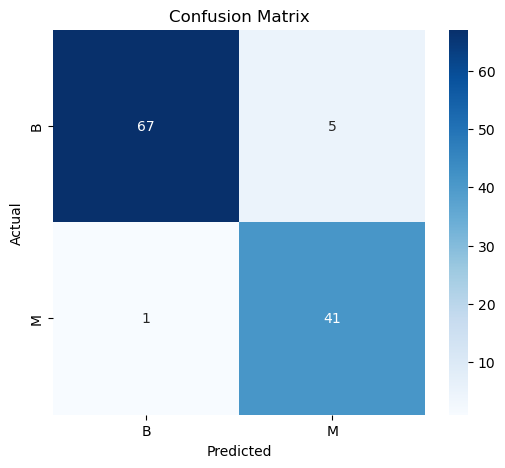

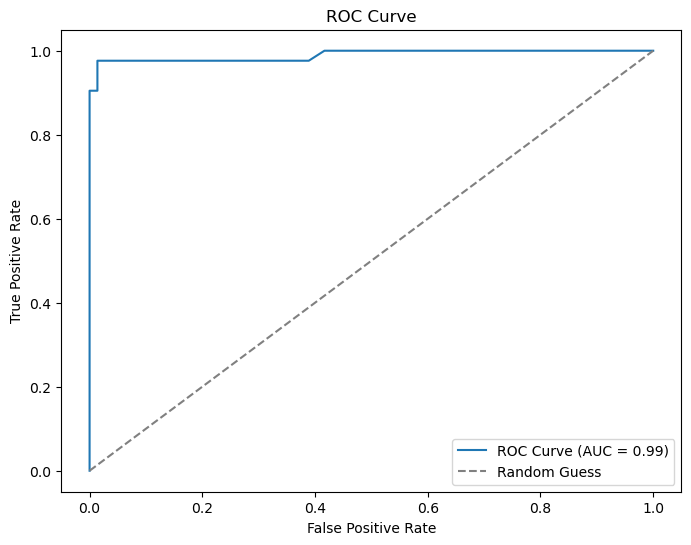

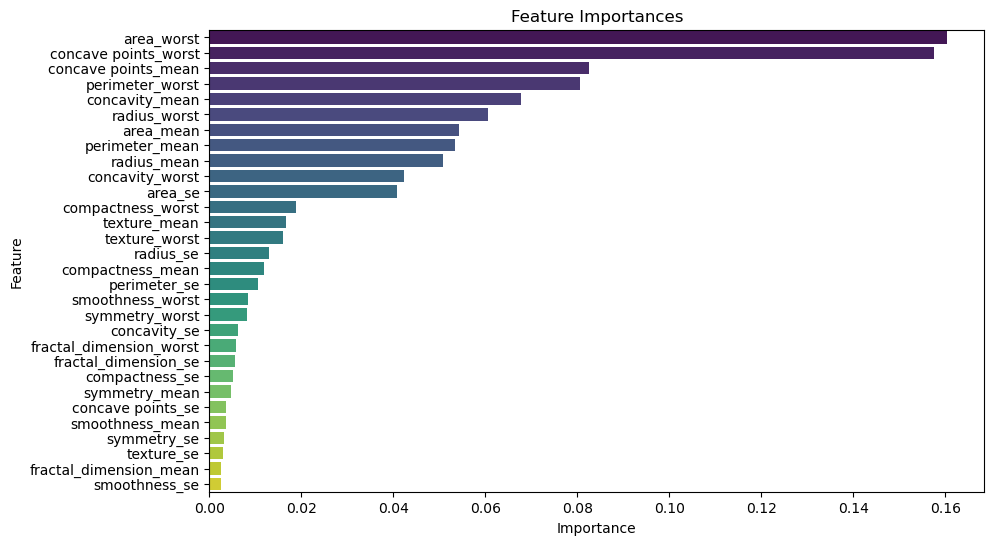

In [5]:
# Split the dataset into features and target
X = df.drop(columns=['diagnosis', 'id'])  # Exclude the target column
y = df['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC Curve
# Convert y_test to numeric if necessary
y_test_numeric = y_test.map({'B': 0, 'M': 1})  # Option 2

# Compute probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test_numeric, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Feature Importances
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [7]:
from sklearn.metrics import make_scorer, recall_score
scorer = make_scorer(recall_score, pos_label='M')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=param_grid, cv=5, scoring=scorer, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train model with the best parameters
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_s

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_s

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_s

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf

In [8]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, bootstrap=False, max_depth=5, min_samples_leaf=1,
                           min_samples_split=5, n_estimators=100,class_weight='balanced')

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.94      0.96        72
           M       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[68  4]
 [ 1 41]]


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-Validation Accuracy: 0.9606 ± 0.0322


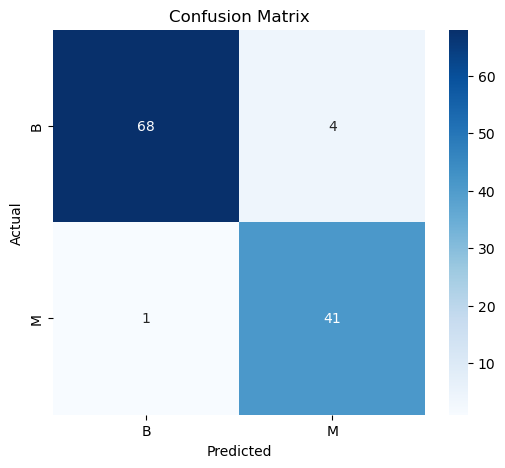

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_leaf=1,
                           min_samples_split=5, n_estimators=100)
# Apply SelectKBest
selector = SelectKBest(score_func=chi2, k=27)  # k="all" to get scores for all features
#selector.fit(X_train, y_train)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


rf.fit(X_train_selected, y_train)
# Get the scores of the selected features
feature_scores = selector.scores_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame with feature names and their corresponding scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
})

# Sort the features by score
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)

# Display the selected features with their scores
print(feature_importance_df)

# Predict on the test set
y_pred = rf.predict(X_test_selected)
y_pred_prob = rf.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

                    Feature         Score
23               area_worst  92574.107701
3                 area_mean  44301.419325
13                  area_se   7337.838986
22          perimeter_worst   3013.196990
2            perimeter_mean   1647.177721
20             radius_worst    403.262787
0               radius_mean    217.672175
12             perimeter_se    210.120610
21            texture_worst    141.067689
1              texture_mean     73.630059
26          concavity_worst     30.688979
10                radius_se     29.008044
6            concavity_mean     15.882058
25        compactness_worst     15.362710
27     concave points_worst     10.859628
7       concave points_mean      8.778762
5          compactness_mean      4.673977
28           symmetry_worst      1.125014
16             concavity_se      0.738713
15           compactness_se      0.452153
24         smoothness_worst      0.353090
17        concave points_se      0.248689
8             symmetry_mean      0

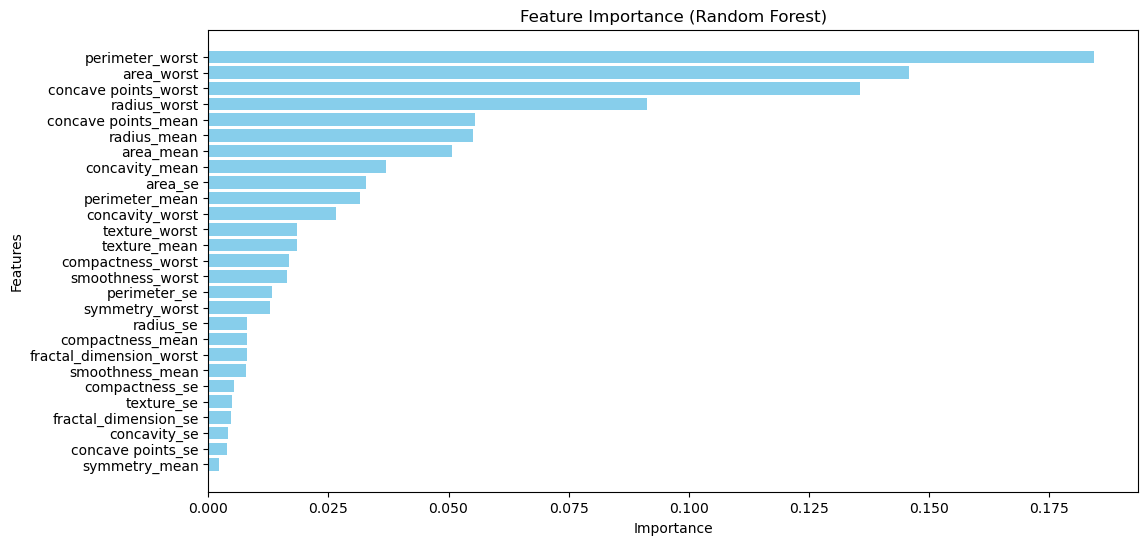

In [12]:
selected_feature_indices = selector.get_support(indices=True) 
selected_feature_names = X_test.columns[selected_feature_indices]
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_feature_names,  # Replace X.columns with actual feature names if needed
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

In [13]:
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
# Combine X_test_selected_df and y_test for easier analysis
X_test_with_labels = pd.concat([X_test_selected_df.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Rename target column for clarity (optional)
X_test_with_labels.rename(columns={0: 'True Label'}, inplace=True)

# Add predictions and predicted probabilities
X_test_with_labels['Predicted Label'] = y_pred
X_test_with_labels['Predicted Probability'] = y_pred_prob  # Assuming positive class at index 1

# Find misclassified samples
errors = X_test_with_labels[X_test_with_labels['diagnosis'] != X_test_with_labels['Predicted Label']]

print(errors)

    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
16        13.80         15.79           90.43      584.1          0.10070   
24        14.48         21.46           94.25      648.2          0.09444   
42        14.60         23.29           93.97      664.7          0.08682   

    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
16           0.12800         0.07789              0.05069         0.1662   
24           0.09947         0.12040              0.04938         0.2075   
42           0.06636         0.08390              0.05271         0.1627   

    radius_se  ...  area_worst  smoothness_worst  compactness_worst  \
16     0.2787  ...       812.4            0.1411             0.3542   
24     0.4204  ...       808.9            0.1306             0.1976   
42     0.4157  ...       758.2            0.1312             0.1581   

    concavity_worst  concave points_worst  symmetry_worst  \
16           0.2779                0.138

In [14]:
# Create 'errors' column: 1 if there is an error (i.e., 'diagnosis' != 'Predicted Label'), else 0
X_test_with_labels['errors'] = np.where(X_test_with_labels['diagnosis'] != X_test_with_labels['Predicted Label'], 1, 0)

# View the updated DataFrame
X_test_with_labels

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Predicted Label,Predicted Probability,errors
0,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.1408,...,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523,B,B,0.005000,0
1,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,1.0040,...,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849,M,M,1.000000,0
2,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.1745,...,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960,B,B,0.364167,0
3,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.2895,...,0.1431,0.3026,0.31940,0.15650,0.2718,0.09353,M,M,0.525000,0
4,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.3408,...,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,B,B,0.048333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.1642,...,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287,B,B,0.000000,0
110,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.1507,...,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278,B,B,0.000000,0
111,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.2535,...,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463,B,B,0.069167,0
112,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.2711,...,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740,M,M,0.569167,0


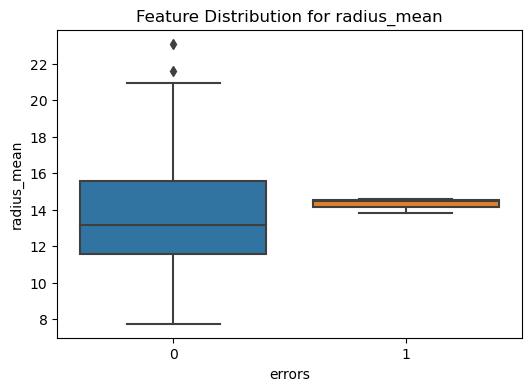

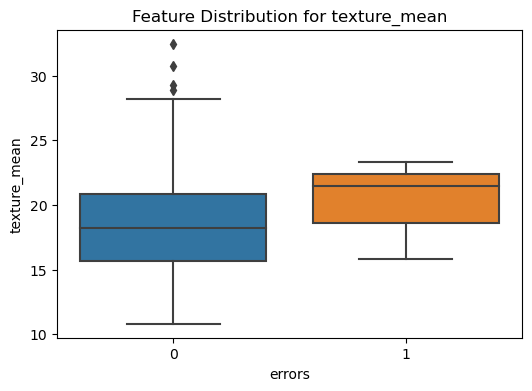

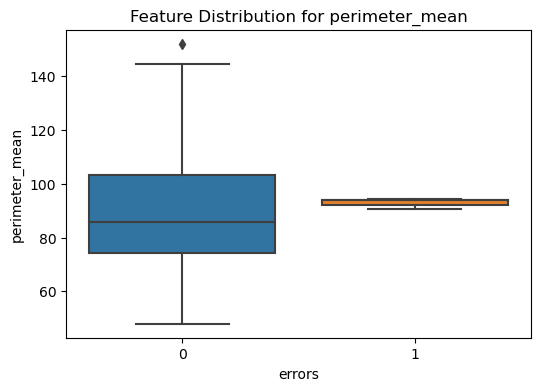

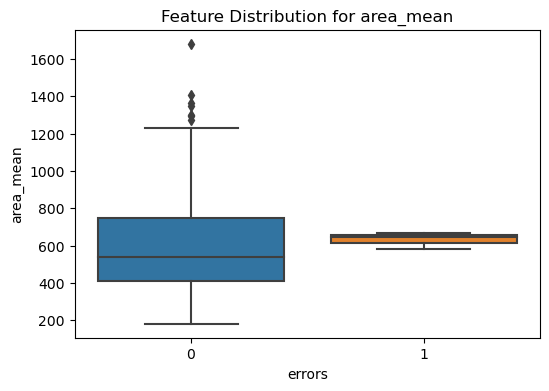

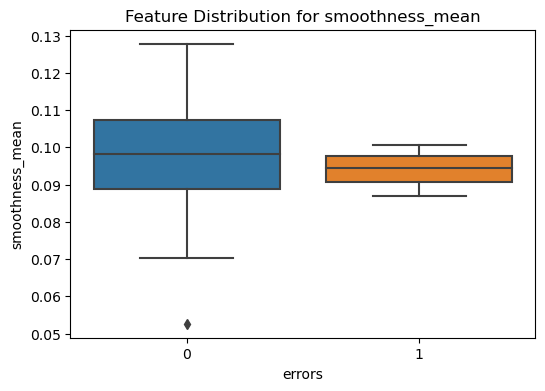

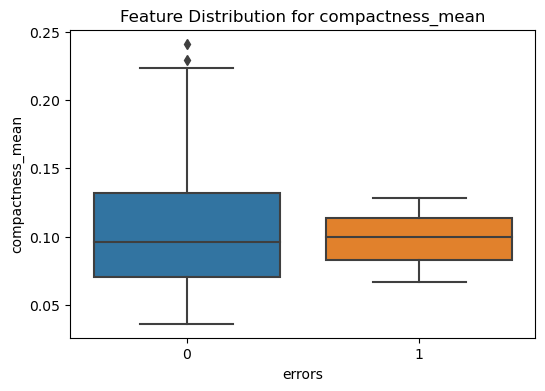

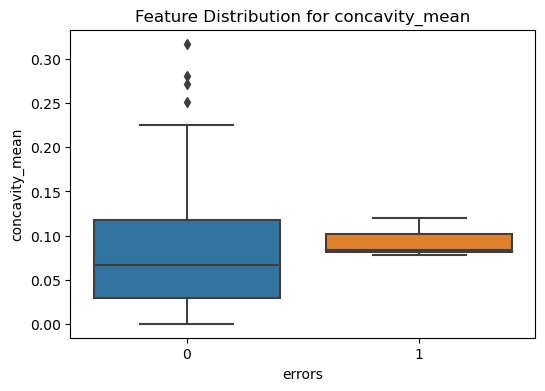

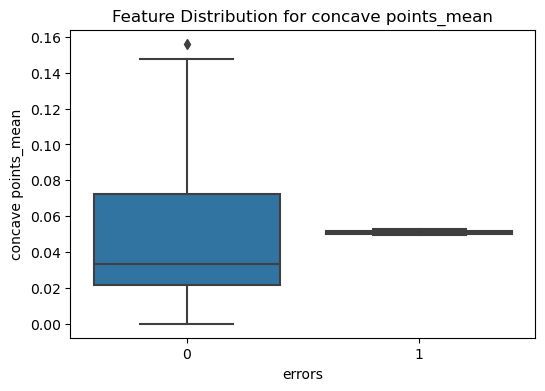

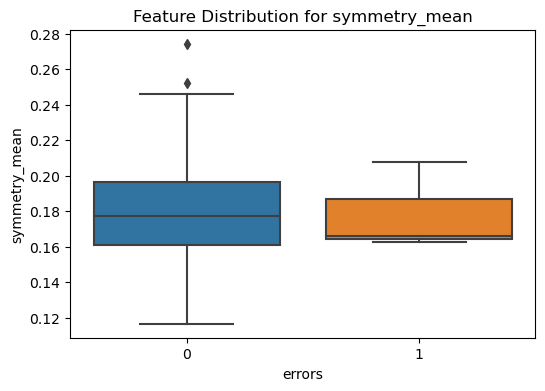

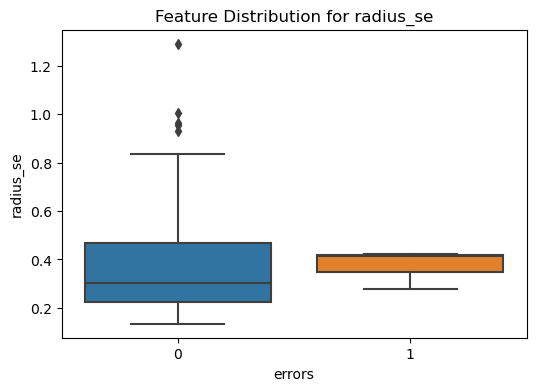

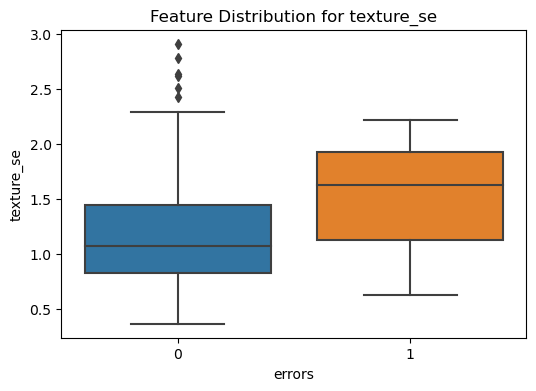

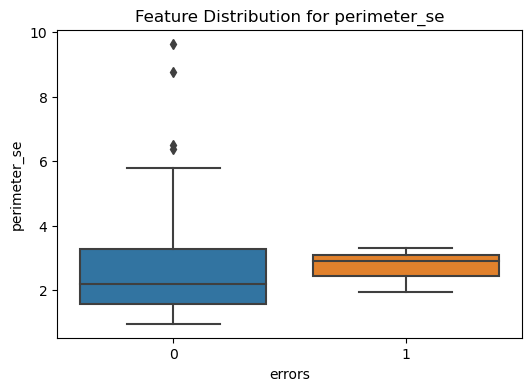

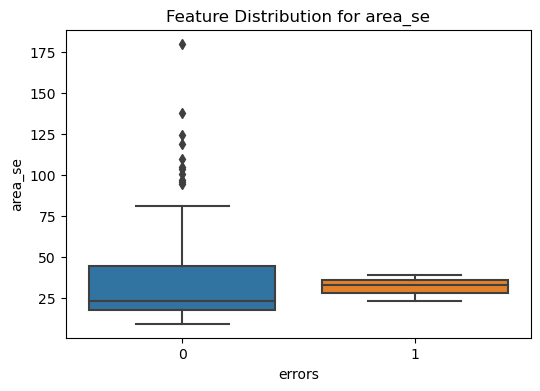

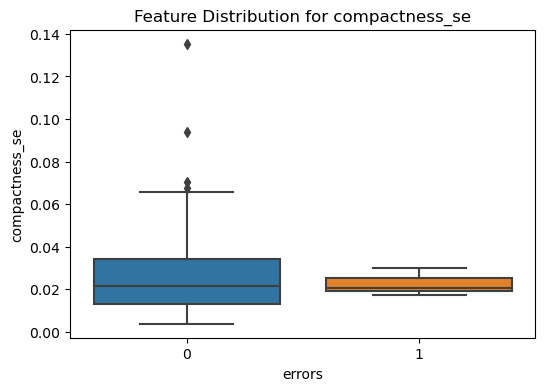

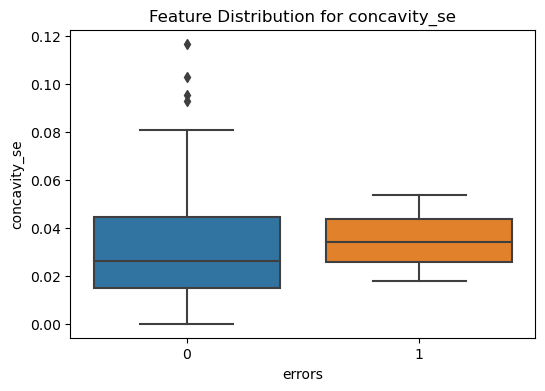

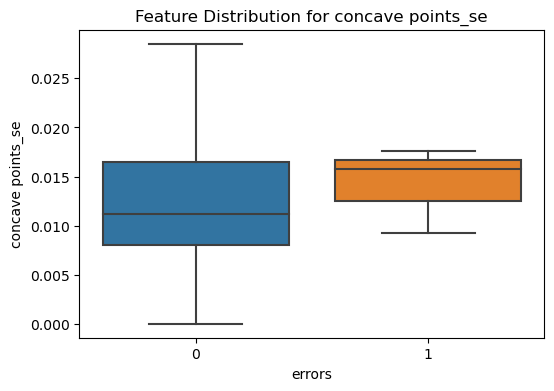

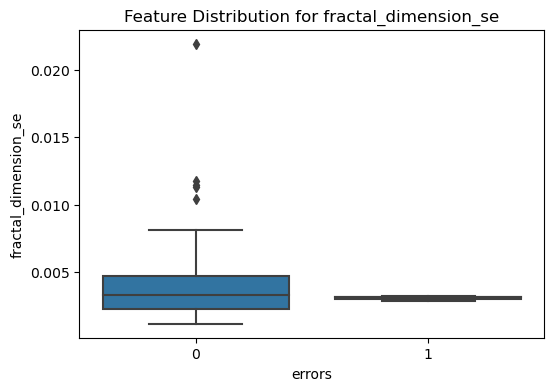

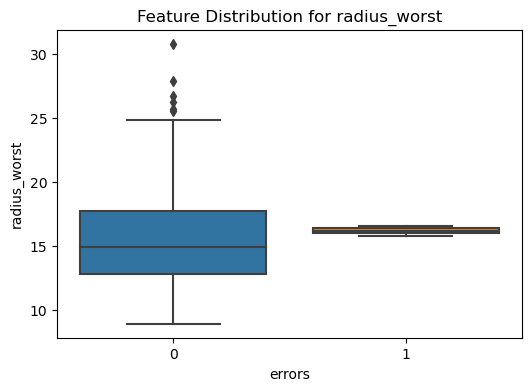

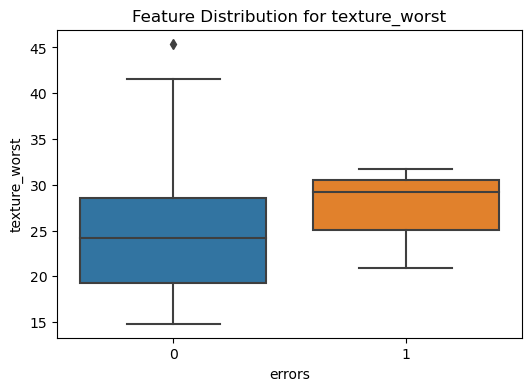

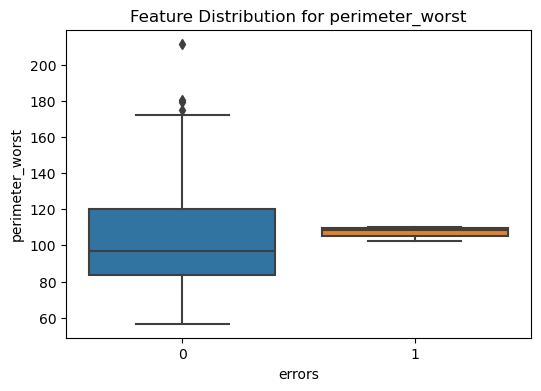

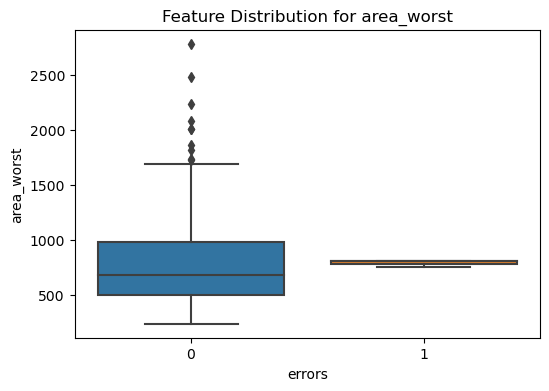

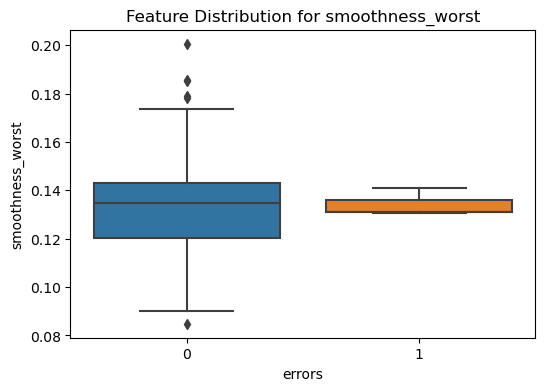

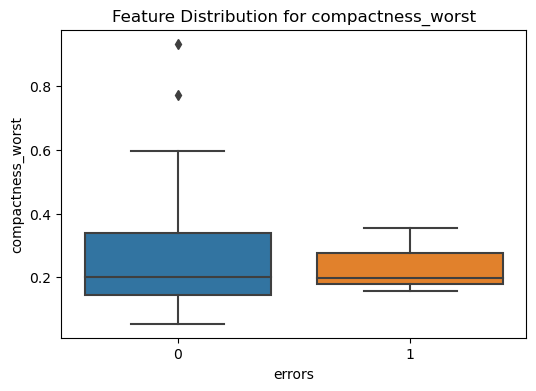

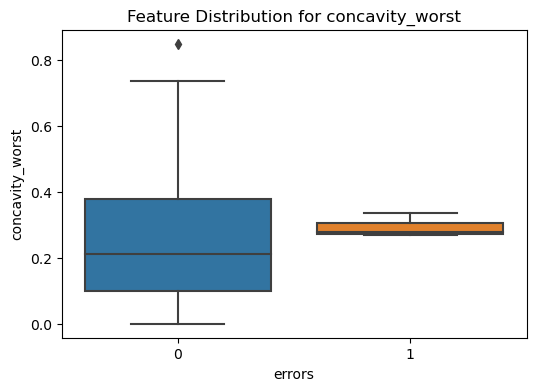

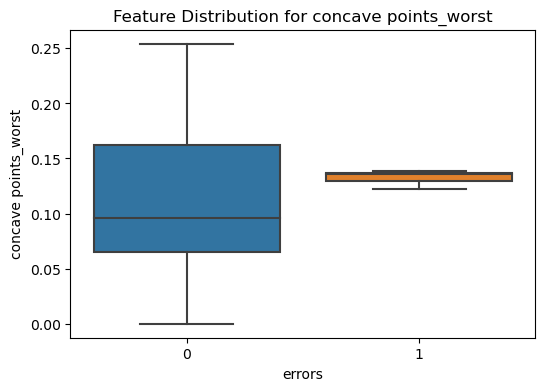

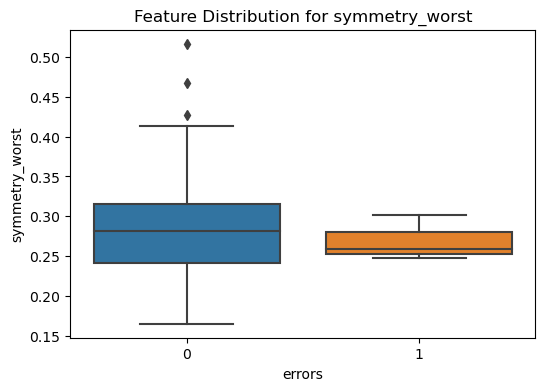

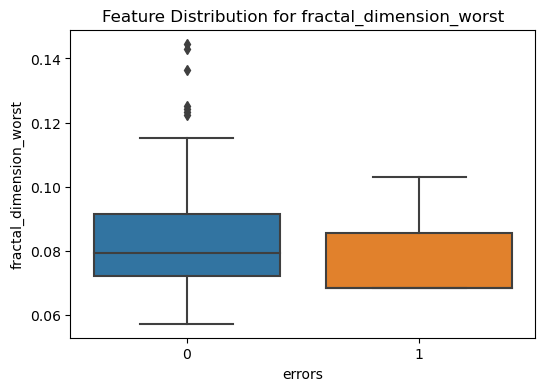

In [15]:
for feature in selected_feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=X_test_with_labels, x='errors', y=feature)
    plt.title(f'Feature Distribution for {feature}')
    plt.show()

In [18]:
y_pred_prob = rf.predict_proba(X_test_selected)[:, 1]  # Probabilities for class 1
new_threshold = 0.1  # Example threshold
y_pred_adjusted = (y_pred_prob >= new_threshold).astype(int)

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 30 features, but RandomForestClassifier is expecting 27 features as input.

In [19]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

roc_auc = roc_auc_score(y_test, y_pred_adjusted)
print(f"\nROC AUC Score: {roc_auc:.4f}")

Classification Report:


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['B' 'M'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.